# 2. Importing Library

In [1]:
# First we will import the necessary Library 


import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import pickle

# 3. Loading Dataset

In [2]:
# Load our dataset 
# Note it should be in same dir


maindf=pd.read_csv('ETH-USD.csv')

In [3]:
print('Total number of days present in the dataset: ',maindf.shape[0])
print('Total number of fields present in the dataset: ',maindf.shape[1])

Total number of days present in the dataset:  1969
Total number of fields present in the dataset:  7


In [4]:
maindf.shape

(1969, 7)

In [5]:
maindf.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984


In [6]:
maindf.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1964,2023-03-27,1775.481323,1781.379272,1690.516602,1715.460815,1715.460815,8585750760
1965,2023-03-28,1715.327393,1791.110962,1702.564697,1772.785645,1772.785645,8346890042
1966,2023-03-29,1772.899902,1825.600952,1772.899902,1793.001831,1793.001831,9136176952
1967,2023-03-30,1793.345947,1827.280273,1766.248901,1792.737183,1792.737183,9724496987
1968,2023-03-31,1796.858398,1842.897827,1783.794922,1825.859497,1825.859497,9198848000


In [7]:
maindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1969 non-null   object 
 1   Open       1969 non-null   float64
 2   High       1969 non-null   float64
 3   Low        1969 non-null   float64
 4   Close      1969 non-null   float64
 5   Adj Close  1969 non-null   float64
 6   Volume     1969 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 107.8+ KB


In [8]:
maindf.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1969.000000,1969.000000,1969.000000,1969.000000,1969.000000,1.969000e+03
mean,1150.294604,1186.576043,1109.599525,1150.832840,1150.832840,1.269165e+10
std,1165.335701,1200.705071,1124.617308,1164.816228,1164.816228,1.059928e+10
min,84.279694,85.342743,82.829887,84.308296,84.308296,6.217330e+08
25%,216.969116,221.651993,209.514999,217.046371,217.046371,4.678817e+09
50%,586.021790,604.022461,562.866028,586.734009,586.734009,1.030862e+10
75%,1727.061890,1784.497803,1678.108032,1732.254639,1732.254639,1.776813e+10
max,4810.071289,4891.704590,4718.039063,4812.087402,4812.087402,8.448291e+10


# Checking for Null Values

In [9]:
print('Null Values:',maindf.isnull().values.sum())

Null Values: 0


In [10]:
print('NA values:',maindf.isnull().values.any())

NA values: False


In [11]:
# Final shape of the dataset after dealing with null values 

maindf.shape

(1969, 7)

In [12]:
maindf['Date'] = pd.to_datetime(maindf['Date'], format='%Y-%m-%d')

y_overall = maindf.loc[(maindf['Date'] >= '2014-09-17')
                     & (maindf['Date'] <= '2023-03-30')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2017-11-09,308.644989,329.451996,307.056000,320.884003
1,2017-11-10,320.670990,324.717987,294.541992,299.252991
2,2017-11-11,298.585999,319.453003,298.191986,314.681000
3,2017-11-12,314.690002,319.153015,298.513000,307.907990
4,2017-11-13,307.024994,328.415009,307.024994,316.716003
...,...,...,...,...,...
1963,2023-03-26,1743.842163,1797.880249,1741.182861,1775.676758
1964,2023-03-27,1775.481323,1781.379272,1690.516602,1715.460815
1965,2023-03-28,1715.327393,1791.110962,1702.564697,1772.785645
1966,2023-03-29,1772.899902,1825.600952,1772.899902,1793.001831


In [13]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,1184.041902,1185.483545
February,1231.736623,1232.698192
March,1195.930266,1198.653057
April,1246.177901,1250.662702
May,1292.438870,1287.031380
June,959.265114,950.002085
July,886.457313,892.302205
August,1140.152248,1144.327363
September,1125.387235,1120.621615


In [14]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'], 
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

In [15]:
# Lets First Take all the Close Price 
closedf = maindf[['Date','Close']]
print("Shape of close dataframe:", closedf.shape)

Shape of close dataframe: (1969, 2)


In [16]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2023', plot_bgcolor='white', 
                  font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

### Now we will Take data of just 5 Year

In [17]:
closedf = closedf[closedf['Date'] > '2022-06-01']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  303


In [18]:
closedf

,Date,Close
1666,2022-06-02,1834.150513
1667,2022-06-03,1775.078613
1668,2022-06-04,1801.609497
1669,2022-06-05,1805.204956
1670,2022-06-06,1859.289673
...,...,...
1964,2023-03-27,1715.460815
1965,2023-03-28,1772.785645
1966,2023-03-29,1793.001831
1967,2023-03-30,1792.737183


In [19]:
fig = px.line(closedf, x=closedf.Date, y=closedf.Close,labels={'date':'Date','close':'Close Stock'})
fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
fig.update_layout(title_text='Considered period to predict Bitcoin close price', 
                  plot_bgcolor='white', font_size=15, font_color='black')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [20]:
# deleting date column and normalizing using MinMax Scaler

del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(303, 1)


* ### Slicing data into Training set and Testing set

In [21]:
# we keep the training set as 60% and 40% testing set

training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (181, 1)
test_data:  (122, 1)


In [22]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [23]:
time_step = 15
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (165, 15)
y_train:  (165,)
X_test:  (106, 15)
y_test (106,)


In [24]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (165, 15, 1)
X_test:  (106, 15, 1)


* # Actuall Model Building

In [25]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [26]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

Epoch 1/200
6/6 [==============================] - 2s 80ms/step - loss: 0.2010 - val_loss: 0.2601
Epoch 2/200
6/6 [==============================] - 0s 13ms/step - loss: 0.1803 - val_loss: 0.2297
Epoch 3/200
6/6 [==============================] - 0s 14ms/step - loss: 0.1568 - val_loss: 0.2002
Epoch 4/200
6/6 [==============================] - 0s 13ms/step - loss: 0.1347 - val_loss: 0.1709
Epoch 5/200
6/6 [==============================] - 0s 16ms/step - loss: 0.1140 - val_loss: 0.1426
Epoch 6/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0939 - val_loss: 0.1153
Epoch 7/200
6/6 [==============================] - 0s 12ms/step - loss: 0.0748 - val_loss: 0.0902
Epoch 8/200
6/6 [==============================] - 0s 10ms/step - loss: 0.0595 - val_loss: 0.0684
Epoch 9/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0464 - val_loss: 0.0499
Epoch 10/200
6/6 [==============================] - 0s 13ms/step - loss: 0.0365 - val_loss: 0.0348
Epoch 11/200
6/6 [=

- ### Plotting Loss vs Validation loss 

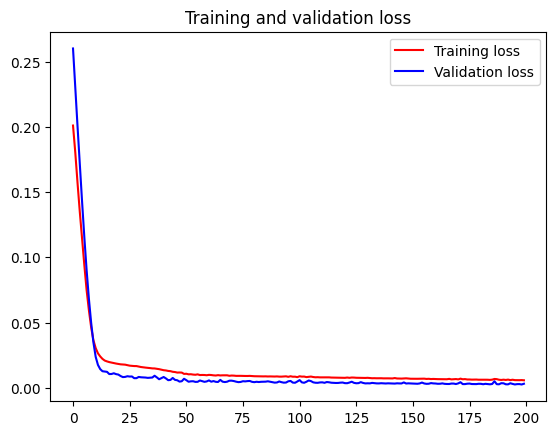

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()


plt.show()

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

4/4 [==============================] - 0s 2ms/step


((165, 1), (106, 1))

- # Model Evaluation

In [29]:
# Transform back to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

- ## Evaluation metrices RMSE, MSE and MAE

In [30]:
# Evaluation metrices RMSE and MAE
print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))

Train data RMSE:  75.7274732049248
Train data MSE:  5734.650198002605
Train data MAE:  54.92893844455492
-------------------------------------------------------------------------------------
Test data RMSE:  54.992515875698636
Test data MSE:  3024.176802338967
Test data MAE:  41.065013978405084


- ## Variance Regression Score

In [31]:
print("Train data explained variance regression score:", 
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:", 
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.891485160634712
Test data explained variance regression score: 0.93180337016675


- ## R square score for regression

In [32]:
print("Train data R2 score:", r2_score(original_ytrain, train_predict))
print("Test data R2 score:", r2_score(original_ytest, test_predict))

Train data R2 score: 0.8891434758633133
Test data R2 score: 0.9190396483200092


- ## Regression Loss Mean Gamma deviance regression loss (MGD) and Mean Poisson deviance regression loss (MPD)

In [33]:
print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
print("----------------------------------------------------------------------")
print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))

Train data MGD:  0.0028953293302726476
Test data MGD:  0.0012912808925574007
----------------------------------------------------------------------
Train data MPD:  4.031120174245131
Test data MPD:  1.967035629931624


In [34]:
# shift train predictions for plotting

look_back=time_step
trainPredictPlot = np.empty_like(closedf)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
print("Train predicted data: ", trainPredictPlot.shape)

# shift test predictions for plotting
testPredictPlot = np.empty_like(closedf)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(closedf)-1, :] = test_predict
print("Test predicted data: ", testPredictPlot.shape)

names = cycle(['Original close price','Train predicted close price','Test predicted close price'])


plotdf = pd.DataFrame({'date': close_stock['Date'],
                       'original_close': close_stock['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                          plotdf['test_predicted_close']],
              labels={'value':'Stock price','date': 'Date'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

Train predicted data:  (303, 1)
Test predicted data:  (303, 1)


- # Predicting next 30 days

In [35]:
x_input=test_data[len(test_data)-time_step:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=time_step
i=0
pred_days = 7
while(i<pred_days):
    
    if(len(temp_input)>time_step):
        
        x_input=np.array(temp_input[1:])
        #print("{} day input {}".format(i,x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
       
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        
        lst_output.extend(yhat.tolist())
        i=i+1
               
print("Output of predicted next days: ", len(lst_output))

Output of predicted next days:  7


- # Plotting last 15 days of dataset and next predicted 30 days

In [36]:
print(lst_output[2])
last_days=np.arange(1,time_step+1)
day_pred=np.arange(time_step+1,time_step+pred_days+1)
print(last_days)
print(day_pred)

[0.7732824683189392]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
[16 17 18 19 20 21 22]


In [37]:
temp_mat = np.empty((len(last_days)+pred_days+1,1))
temp_mat[:] = np.nan
temp_mat = temp_mat.reshape(1,-1).tolist()[0]

last_original_days_value = temp_mat
next_predicted_days_value = temp_mat

last_original_days_value[0:time_step+1] = scaler.inverse_transform(closedf[len(closedf)-time_step:]).reshape(1,-1).tolist()[0]
next_predicted_days_value[time_step+1:] = scaler.inverse_transform(np.array(lst_output).reshape(-1,1)).reshape(1,-1).tolist()[0]

new_pred_plot = pd.DataFrame({
    'last_original_days_value':last_original_days_value,
    'next_predicted_days_value':next_predicted_days_value
})

names = cycle(['Last 15 days close price','Predicted next 30 days close price'])

fig = px.line(new_pred_plot,x=new_pred_plot.index, y=[new_pred_plot['last_original_days_value'],
                                                      new_pred_plot['next_predicted_days_value']],
              labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Compare last 15 days vs next 30 days',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Close Price')

fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()
fbitfile= open("eth.txt", "wb")
pickle.dump((next_predicted_days_value),fbitfile)
fbitfile.close()


- # Plotting entire Closing Stock Price with next 30 days period of prediction

In [38]:
lstmdf=closedf.tolist()
lstmdf.extend((np.array(lst_output).reshape(-1,1)).tolist())
lstmdf=scaler.inverse_transform(lstmdf).reshape(1,-1).tolist()[0]

names = cycle(['Close price'])

fig = px.line(lstmdf,labels={'value': 'Stock price','index': 'Timestamp'})
fig.update_layout(title_text='Plotting whole closing stock price with prediction',
                  plot_bgcolor='white', font_size=15, font_color='black',legend_title_text='Stock')

fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()